In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Define parameters and time grid
T = 1 # time horizon
nsteps = 128 # number of time steps
dt = T/nsteps # time step
t=np.linspace(0,T,num=nsteps) # observation times
mu = 2 
sigma = 1
S0 = 1 # initial stock price

In [84]:
# Generating normaly distributed random numbers
np.random.seed(12)
r = np.random.randn(nsteps)
R = np.cumsum(r)

# Euler-Maruyama Aproximation
path = np.zeros(nsteps)
path[0] = S0
for i in range(1,nsteps):
    # El r-1 es para obtener primer valor de random y no segundo y concuerde con exact
    path[i] = path[i-1]*(1+(mu*dt)+(sigma*r[i-1]*np.sqrt(dt)))
    
# Milstein Correction Method
path_m = np.zeros(nsteps)
path_m[0] = S0
for i in range(1,nsteps):
    path_m[i] = path_m[i-1]*(1+(mu*dt)+(sigma*r[i-1]*np.sqrt(dt)) + (.5*sigma**2*((r[i-1]**2)-1)*dt))

# Exact solution
dX = (mu-0.5*(sigma**2))*dt + sigma*r*np.sqrt(dt)
X = np.cumsum(dX) # Accumulate the increments
S = S0*np.exp(X) # Transform to geometric Brownian motion 

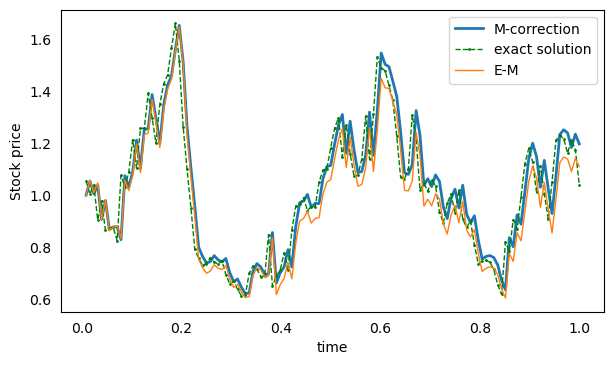

In [85]:
plot0 = plt.figure(0,figsize=(7,4), dpi=100)
plt.plot(t,path_m, linewidth=2, markersize=1, label = "M-correction")  
plt.plot(t,S, 'go--', linewidth=1, markersize=1, label = "exact solution") 
plt.plot(t,path, linewidth=1, markersize=1, label = "E-M")  
plt.xlabel("time")
plt.ylabel("Stock price")
plt.legend()